In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
df = pd.read_excel(r'C:\Users\fcampos\Desktop\estatistica\20231121150628.xlsx')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Produto das Lavouras Temporárias  33 non-null     int64
 1   Cana-de-açúcar                    33 non-null     int64
 2   Milho (em grão)                   33 non-null     int64
 3   Soja (em grão)                    33 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [37]:
df['Produto das Lavouras Temporárias'] = pd.to_datetime(df['Produto das Lavouras Temporárias'], format='%Y')

Os valores dos coeficientes "a" e "b" para Cana-de-açúcar são, respectivamente, iguais a: (245923.3455882353, -486162501.79545456)

A previsão para área colhida para o ano de 2023 referente às commodities agrícolas é dada pela descrição abaixo:
Cana-de-Açúcar: 11340426.33 hectares (ha)
Milho: 17429415.72 hectares (ha)
Soja: 38729625.10 hectares (ha)


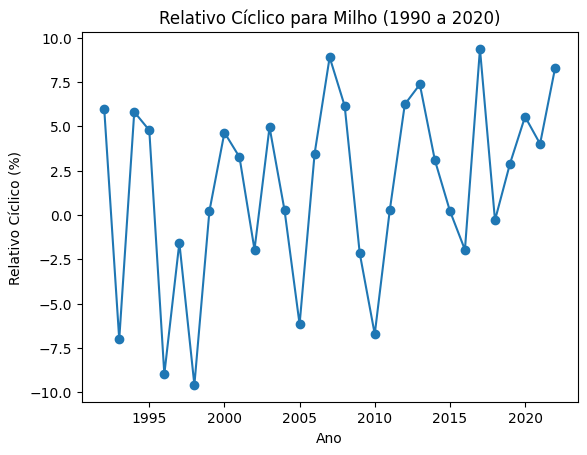

In [42]:
# Importando a biblioteca pandas para trabalhar com DataFrames
import pandas as pd


# Função para calcular os coeficientes "a" e "b" da linha de tendência
def calcular_coeficientes(x, y):
    n = len(x)
    somatorio_xy = sum(x * y)
    somatorio_x = sum(x)
    somatorio_y = sum(y)
    somatorio_x_quadrado = sum(x**2)

    a = (n * somatorio_xy - somatorio_x * somatorio_y) / (n * somatorio_x_quadrado - somatorio_x**2)
    b = (somatorio_y - a * somatorio_x) / n

    return a, b

# Aplicando a função para cada commodity
x = df['Produto das Lavouras Temporárias']
y_cana = df['Cana-de-açúcar']
y_milho = df['Milho (em grão)']
y_soja = df['Soja (em grão)']

coeficientes_cana = calcular_coeficientes(x, y_cana)
coeficientes_milho = calcular_coeficientes(x, y_milho)
coeficientes_soja = calcular_coeficientes(x, y_soja)

# Exibindo os resultados dos coeficientes
print(f'Os valores dos coeficientes "a" e "b" para Cana-de-açúcar são, respectivamente, iguais a: {coeficientes_cana}')

# Função para prever a área colhida para o ano de 2023
def prever_area_colhida(a, b, ano):
    previsao = a * ano + b
    return previsao

# Aplicando a função para cada commodity
previsao_cana = prever_area_colhida(*coeficientes_cana, 2023)
previsao_milho = prever_area_colhida(*coeficientes_milho, 2023)
previsao_soja = prever_area_colhida(*coeficientes_soja, 2023)

# Exibindo os resultados das previsões
print(f'\nA previsão para área colhida para o ano de 2023 referente às commodities agrícolas é dada pela descrição abaixo:')
print(f'Cana-de-Açúcar: {previsao_cana:.2f} hectares (ha)')
print(f'Milho: {previsao_milho:.2f} hectares (ha)')
print(f'Soja: {previsao_soja:.2f} hectares (ha)')

# Função para calcular o relativo cíclico para a commodity "Milho"
def calcular_relativo_ciclico(x, y):
    media_movel = y.rolling(window=3).mean()
    relativo_ciclico = (y - media_movel) / media_movel * 100
    return relativo_ciclico

# Aplicando a função para a commodity "Milho"
relativo_ciclico_milho = calcular_relativo_ciclico(x, y_milho)

# Exibindo o gráfico dos valores do relativo cíclico para o Milho
import matplotlib.pyplot as plt

plt.plot(x, relativo_ciclico_milho, marker='o')
plt.title('Relativo Cíclico para Milho (1990 a 2020)')
plt.xlabel('Ano')
plt.ylabel('Relativo Cíclico (%)')
plt.show()
